In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import sys; sys.path.append('../Utils')
from utils import Utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ut = Utils()

In [5]:
def trainQDA(X, Y, param):
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds)
    f1 = []
    gmean = []
    eficiencia_train = []
    eficiencia_test = []
    for train, test in skf.split(X, Y):
        X_train, Y_train, X_test, Y_test = ut.get_training_test(X=X, Y=Y, train=train, test=test)
        clf = QuadraticDiscriminantAnalysis(reg_param=param)
        clf.fit(X_train, Y_train)
        f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current = ut.get_metrics(model=clf, X_train=X_train, X_test=X_test, y_train=Y_train, Ytest=Y_test)
        f1.append(f1_score_current)
        gmean.append(gmean_current)
        eficiencia_train.append(eficiencia_train_current)
        eficiencia_test.append(eficiencia_test_current)
        print(f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current)
    f1_mean, f1_ic, gmean_mean, gmean_ic, eficiencia_train_mean, eficiencia_train_ic, eficiencia_test_mean, eficiencia_test_ic = ut.get_means_and_ic(f1=f1, gmean=gmean, eficiencia_train=eficiencia_train, eficiencia_test=eficiencia_test)
    return f1_mean, f1_ic, gmean_mean, gmean_ic, eficiencia_train_mean, eficiencia_train_ic, eficiencia_test_mean, eficiencia_test_ic

In [6]:
df_types = pd.DataFrame({'reg_param':pd.Series([0.1, 0.2, 0.3, 0.4, 0.5]),})
df_types["F1_Score"] = ""
df_types["F1_Score IC"] = ""
df_types["Gmean"]= ""
df_types["Gmean IC"]= ""
df_types["Eficiencia Train"] = ""
df_types["Eficiencia Train IC"] = ""
df_types["Eficiencia Test"] = ""
df_types["Eficiencia Test IC"] = ""

In [7]:
params = [0.1, 0.2, 0.3, 0.4, 0.5]
X, Y = ut.get_matrixes()
f1 = []
f1_ic = []
gmean = []
gmean_ic = []
eficiencia_train = []
eficiencia_train_ic = []
eficiencia_test = []
eficiencia_test_ic = []
for param in params:
    f1_mean, f1_ic_, gmean_mean, gmean_ic_, eficiencia_train_mean, eficiencia_train_ic_, eficiencia_test_mean, eficiencia_test_ic_ = trainQDA(X, Y, param)
    
    f1.append(f1_mean)
    f1_ic.append(f1_ic_)
    
    gmean.append(gmean_mean)
    gmean_ic.append(gmean_ic_)
    
    eficiencia_train.append(eficiencia_train_mean)
    eficiencia_train_ic.append(eficiencia_train_ic_)
    
    eficiencia_test.append(eficiencia_test_mean)
    eficiencia_test_ic.append(eficiencia_test_ic_)
    
df_types["F1_Score"] = f1
df_types["F1_Score IC"] = f1_ic
df_types["Gmean"]= gmean
df_types["Gmean IC"]= gmean_ic
df_types["Eficiencia Train"] = eficiencia_train
df_types["Eficiencia Train IC"] = eficiencia_train_ic
df_types["Eficiencia Test"] = eficiencia_test
df_types["Eficiencia Test IC"] = eficiencia_test_ic
df_types.set_index(['reg_param'], inplace=True)
    

/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

0.7814613507747322 0.8314794192830981 0.7947891485361268 0.7777777777777778
0.7915022265995137 0.8399510238496231 0.7854457572502686 0.7888799355358582
0.7811590911338782 0.8306806875801207 0.7800751879699248 0.7767929089443997
0.7363307757978119 0.8003877513527904 0.8039742212674543 0.7373086220789685
0.7667945498582053 0.8221914962156882 0.7684662906258394 0.7657004830917874
0.7589337863412263 0.8151560847777725 0.7521482277121375 0.7566478646253022
0.7406719531158903 0.7996340811814695 0.7451664876476907 0.7365028203062046
0.7144962389184356 0.7822964997675106 0.7781954887218046 0.7139403706688154
0.7532870002149018 0.8128871688336324 0.7531560569433253 0.7536231884057971


/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

0.7427830675759809 0.8033368645756837 0.7373791621911923 0.741337630942788
0.7313177196743527 0.7927800042414582 0.735499462943072 0.7276390008058018
0.7030852725159402 0.7729089576462868 0.7626208378088077 0.701853344077357
0.7569627617122062 0.8153699584875571 0.7499328498522697 0.7568438003220612
0.7383782008024669 0.7995991084045857 0.7352309344790547 0.7365028203062046
0.7315198875238323 0.7927826849938132 0.7325456498388829 0.7276390008058018
0.7009581812463279 0.7710273721316004 0.7596670247046187 0.6994359387590653
0.7597789445816552 0.8172312653191196 0.7491270480795058 0.7592592592592593
0.7379459382637726 0.7989758729438257 0.7349624060150376 0.7356970185334408
0.7328428386740474 0.793406066218811 0.7328141783029001 0.7284448025785657
0.7010316662252728 0.7710253849657285 0.7591299677765844 0.6994359387590653


/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [8]:
df_types

,F1_Score,F1_Score IC,Gmean,Gmean IC,Eficiencia Train,Eficiencia Train IC,Eficiencia Test,Eficiencia Test IC
reg_param,,,,,,,,
0.1,0.772613,0.021357,0.825625,0.015017,0.791071,0.009122,0.770190,0.019568
0.2,0.745224,0.020113,0.804820,0.015353,0.760994,0.013043,0.743198,0.019925
0.3,0.732618,0.018738,0.795478,0.014845,0.747164,0.011254,0.731113,0.019232
0.4,0.731955,0.020172,0.794695,0.015932,0.744344,0.011049,0.730105,0.020631
0.5,0.732900,0.020997,0.795160,0.016487,0.744008,0.010747,0.730709,0.021349


In [9]:
#best results
X_train, X_test, y_train, y_test = ut.get_train_test()
clf = QuadraticDiscriminantAnalysis(reg_param=0.1)
clf.fit(X_train, y_train)

/home/juan/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(reg_param=0.1)

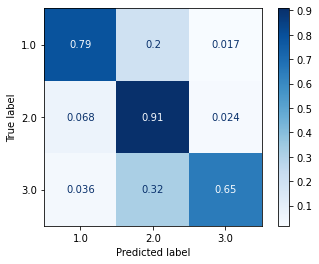

In [10]:
plot_confusion_matrix(clf,X=X_test, y_true=y_test,normalize='true', cmap=plt.cm.Blues)